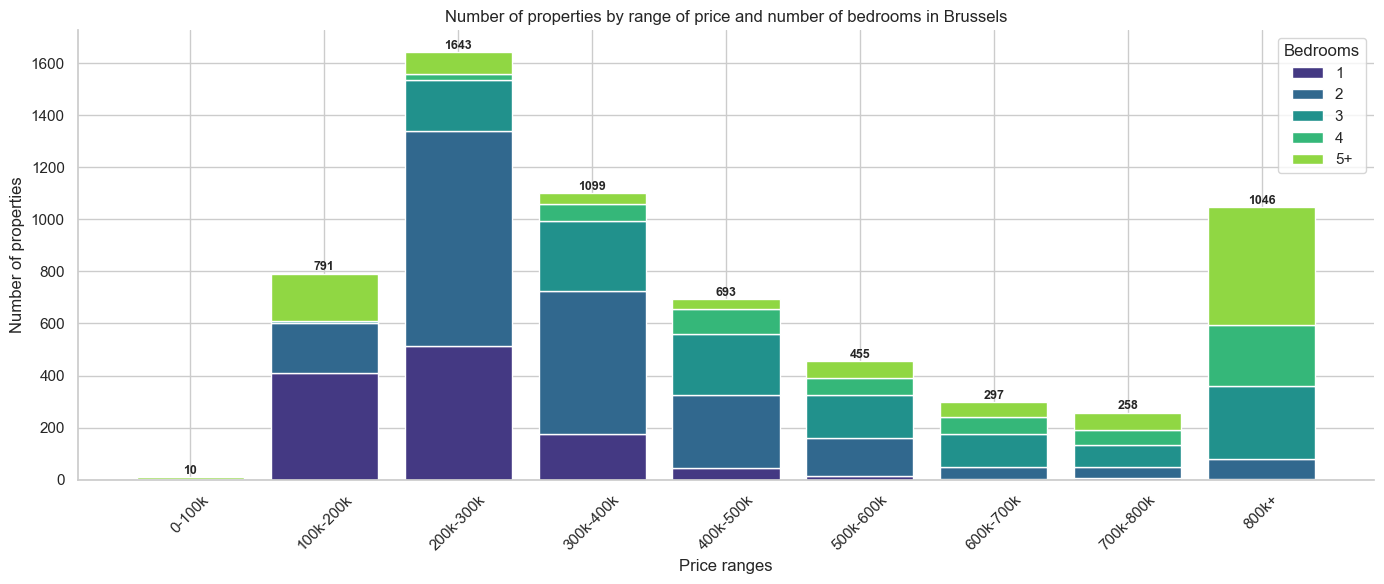

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

input_file = "/Users/meganmarchale/Documents/BeCode/Projects/ImmoEliza_analysis/data/cleaned_data.csv"

df = pd.read_csv(input_file)

# Activer le style seaborn
sns.set_theme(style="whitegrid")

# Filtrer Brussels
df = df[df['region'] == 'Brussels'].copy()

# Créer les tranches de prix
price_bins = [0, 100000, 200000, 300000, 400000, 500000, 600000, 700000, 800000, float('inf')]
price_labels = [
    "0-100k", "100k-200k", "200k-300k", "300k-400k",
    "400k-500k", "500k-600k", "600k-700k", "700k-800k", "800k+"
]
df['price_range'] = pd.cut(df['price'], bins=price_bins, labels=price_labels, right=True)

# Regrouper les chambres >= 5
df['bedroomCount'] = pd.to_numeric(df['bedroomCount'], errors='coerce')
df['bedroomCount'] = df['bedroomCount'].apply(lambda x: int(x) if x < 5 else 5)
df['bedroomGroup'] = df['bedroomCount'].astype(str).replace({'5': '5+'})

# Créer tableau croisé
pivot = pd.crosstab(df['price_range'], df['bedroomGroup'])

# Palette viridis adaptée au nombre de groupes
colors = sns.color_palette("viridis", n_colors=len(pivot.columns))

# Plot
fig, ax = plt.subplots(figsize=(14, 6))
bottom = [0] * len(pivot)
x = range(len(pivot))

# Tracer chaque groupe (empilé)
for idx, col in enumerate(pivot.columns):
    ax.bar(x, pivot[col], bottom=bottom, label=col, color=colors[idx])
    bottom = [i + j for i, j in zip(bottom, pivot[col])]

# Ajouter les totaux au-dessus des barres
totals = pivot.sum(axis=1)
for i, total in enumerate(totals):
    ax.text(i, total + 1, str(total), ha='center', va='bottom', fontsize=9, fontweight='bold')

# Axe et style
ax.set_xticks(x)
ax.set_xticklabels(pivot.index, rotation=45)
ax.set_title("Number of properties by range of price and number of bedrooms in Brussels")
ax.set_xlabel("Price ranges")
ax.set_ylabel("Number of properties")
ax.legend(title="Bedrooms")

sns.despine()
plt.tight_layout()
plt.show()


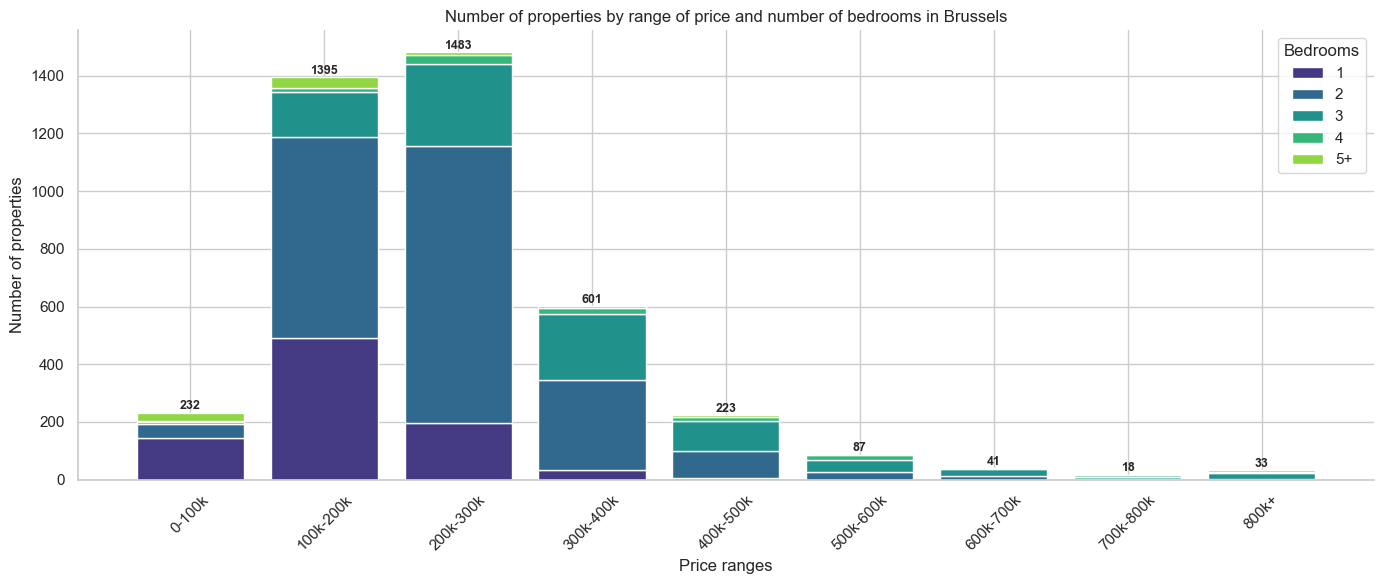

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

input_file = "/Users/meganmarchale/Documents/BeCode/Projects/ImmoEliza_analysis/data/cleaned_data.csv"

df = pd.read_csv(input_file)

# Seaborn style
sns.set_theme(style="whitegrid")

# Filter to be adapted ! -- But in the title as well 
df = df[(df['region'] == 'Wallonia') & (df['type'] == 'APARTMENT')].copy()

# Price ranges
price_bins = [0, 100000, 200000, 300000, 400000, 500000, 600000, 700000, 800000, float('inf')]
price_labels = [
    "0-100k", "100k-200k", "200k-300k", "300k-400k",
    "400k-500k", "500k-600k", "600k-700k", "700k-800k", "800k+"
]
df['price_range'] = pd.cut(df['price'], bins=price_bins, labels=price_labels, right=True)

# Group rooms if >5
df['bedroomCount'] = pd.to_numeric(df['bedroomCount'], errors='coerce')
df['bedroomCount'] = df['bedroomCount'].apply(lambda x: int(x) if x < 5 else 5)
df['bedroomGroup'] = df['bedroomCount'].astype(str).replace({'5': '5+'})

# Crosstab
pivot = pd.crosstab(df['price_range'], df['bedroomGroup'])

# Palette viridis
colors = sns.color_palette("viridis", n_colors=len(pivot.columns))

# Plot
fig, ax = plt.subplots(figsize=(14, 6))
bottom = [0] * len(pivot)
x = range(len(pivot))

# Forcing the grouping of the bar
for idx, col in enumerate(pivot.columns):
    ax.bar(x, pivot[col], bottom=bottom, label=col, color=colors[idx])
    bottom = [i + j for i, j in zip(bottom, pivot[col])]

# Total for each bar
totals = pivot.sum(axis=1)
for i, total in enumerate(totals):
    ax.text(i, total + 1, str(total), ha='center', va='bottom', fontsize=9, fontweight='bold')

# Axis and style
ax.set_xticks(x)
ax.set_xticklabels(pivot.index, rotation=45)
ax.set_title("Number of properties by range of price and number of bedrooms in Brussels")
ax.set_xlabel("Price ranges")
ax.set_ylabel("Number of properties")
ax.legend(title="Bedrooms")

sns.despine()
plt.tight_layout()
plt.show()


In [ ]:
# Same filtered by regions



/var/folders/yr/chrkd6s91_l29kdfjffgp4080000gn/T/ipykernel_7046/275733737.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(['province', 'price_range']).size().reset_index(name='count')


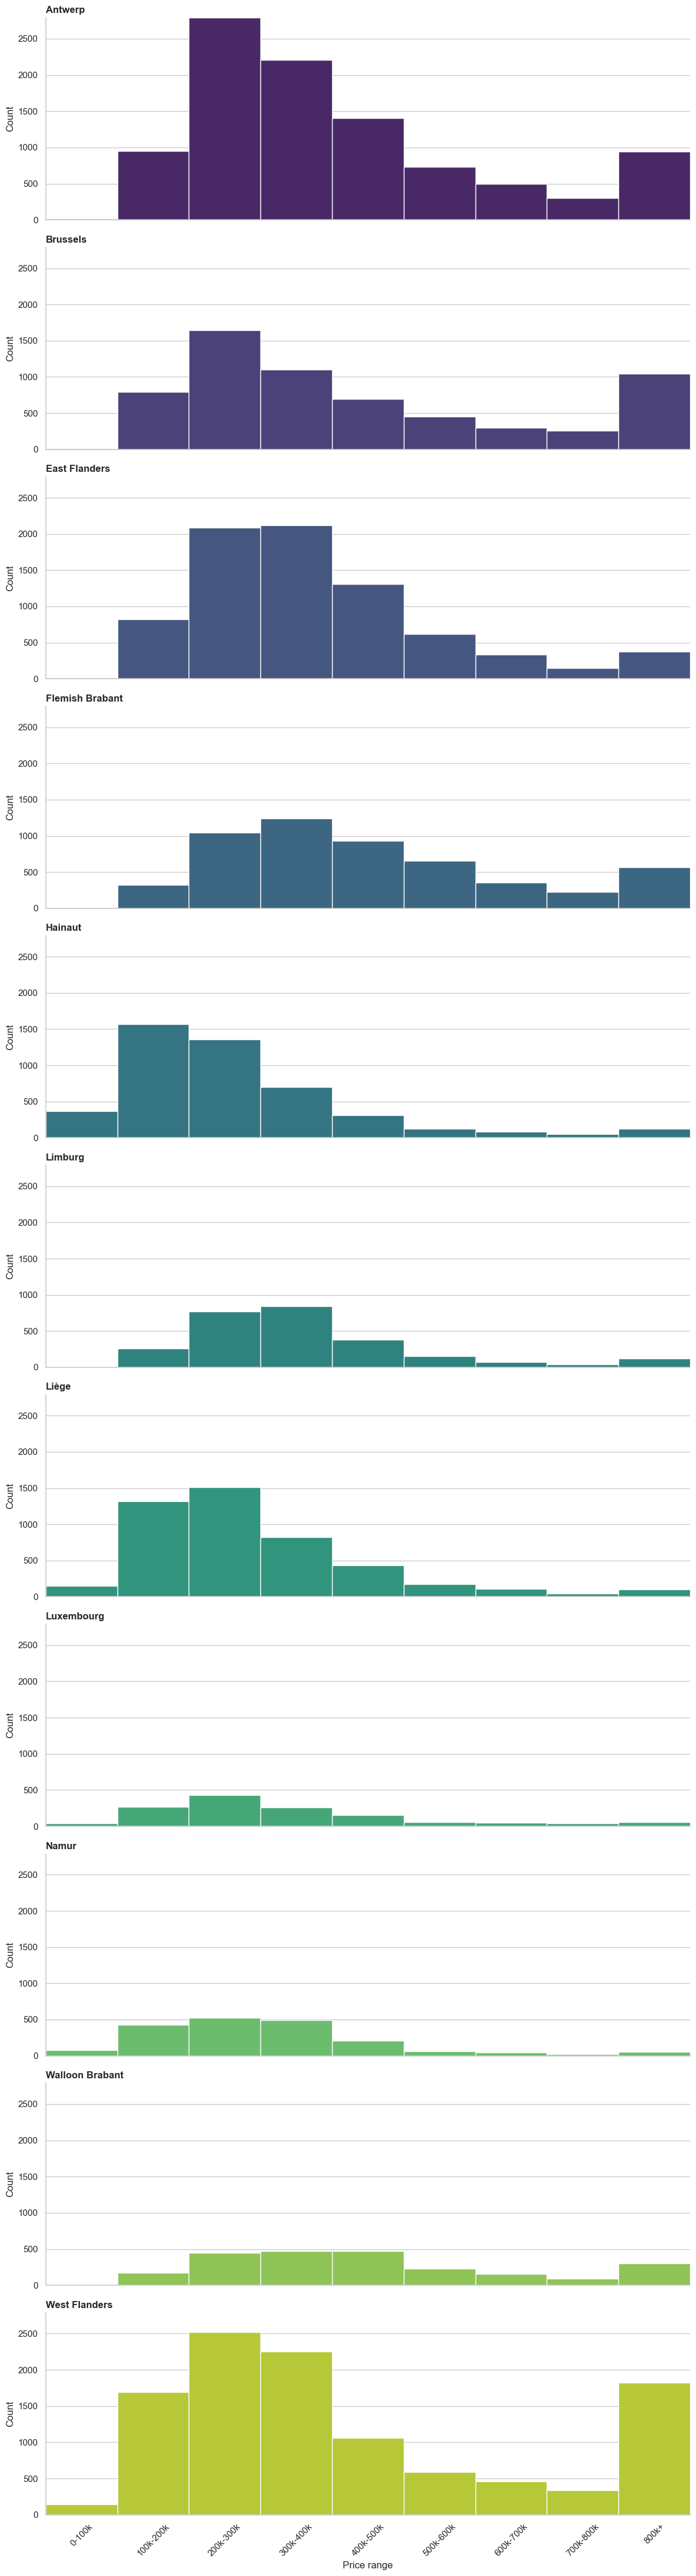

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


input_file = "/Users/meganmarchale/Documents/BeCode/Projects/ImmoEliza_analysis/data/cleaned_data.csv"

df = pd.read_csv(input_file)

# Tranches de prix
price_bins = [0, 100000, 200000, 300000, 400000, 500000, 600000, 700000, 800000, float('inf')]
price_labels = [
    "0-100k", "100k-200k", "200k-300k", "300k-400k",
    "400k-500k", "500k-600k", "600k-700k", "700k-800k", "800k+"
]
df['price_range'] = pd.cut(df['price'], bins=price_bins, labels=price_labels, right=True)

# Grouper les données
grouped = df.groupby(['province', 'price_range']).size().reset_index(name='count')

# Liste des provinces triées
provinces_sorted = sorted(grouped['province'].unique())

# Palette viridis : une couleur par province
palette = sns.color_palette("viridis", n_colors=len(provinces_sorted))
province_colors = dict(zip(provinces_sorted, palette))

# Trouver le Y maximal (pour un axe vertical cohérent)
max_count = grouped['count'].max()

# Créer un subplot par province, même échelle Y
fig, axes = plt.subplots(nrows=len(provinces_sorted), figsize=(12, 4 * len(provinces_sorted)), sharex=True)

for ax, province in zip(axes, provinces_sorted):
    data = grouped[grouped['province'] == province]
    sns.barplot(
        data=data,
        x='price_range',
        y='count',
        ax=ax,
        color=province_colors[province],
        width=1
    )
    ax.set_title(province, loc='left', fontsize=12, weight='bold')
    ax.set_ylabel("Count")
    ax.set_ylim(0, max_count)  # ✅ Fixe la même échelle pour tous
    ax.set_xlabel("")
    ax.tick_params(axis='x', rotation=45)

# Ajouter le label X au dernier graphique
axes[-1].set_xlabel("Price range")

sns.despine()
plt.tight_layout()
plt.show()


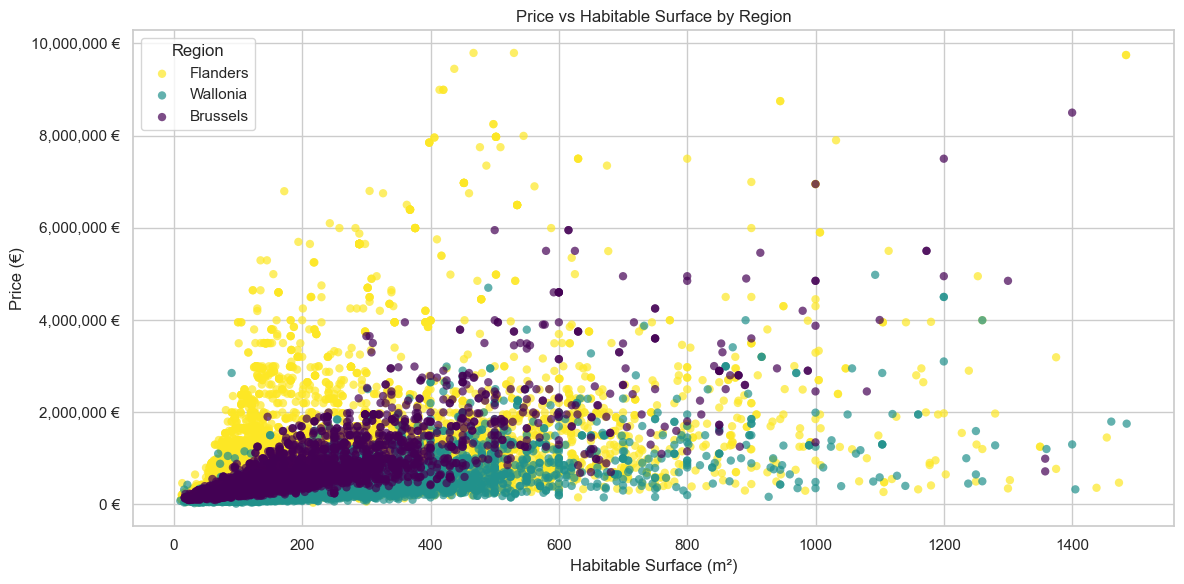

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv(input_file)


# Filter extreme outliers - test
df = df[(df['price'] < 10_000_000) & (df['habitableSurface'] < 1_500)]

# Define region color map
region_palette = {
    'Brussels': '#440154',   # purple
    'Wallonia': '#21918c',   # green/blue
    'Flanders': '#fde725'    # yellow
}

# Create the scatter plot
plot_order = ['Flanders', 'Wallonia', 'Brussels']  # last one comes on top

# Create plot
plt.figure(figsize=(12, 6))

# Plot each region separately
for region in plot_order:
    subset = df[df['region'] == region]
    plt.scatter(
        subset['habitableSurface'],
        subset['price'],
        label=region,
        color=region_palette[region],
        alpha=0.7,
        edgecolor='none'
    )

# Style
plt.title("Price vs Habitable Surface by Region")
plt.xlabel("Habitable Surface (m²)")
plt.ylabel("Price (€)")
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x):,} €'))
plt.legend(title="Region")
plt.grid(True)
plt.tight_layout()
plt.show()


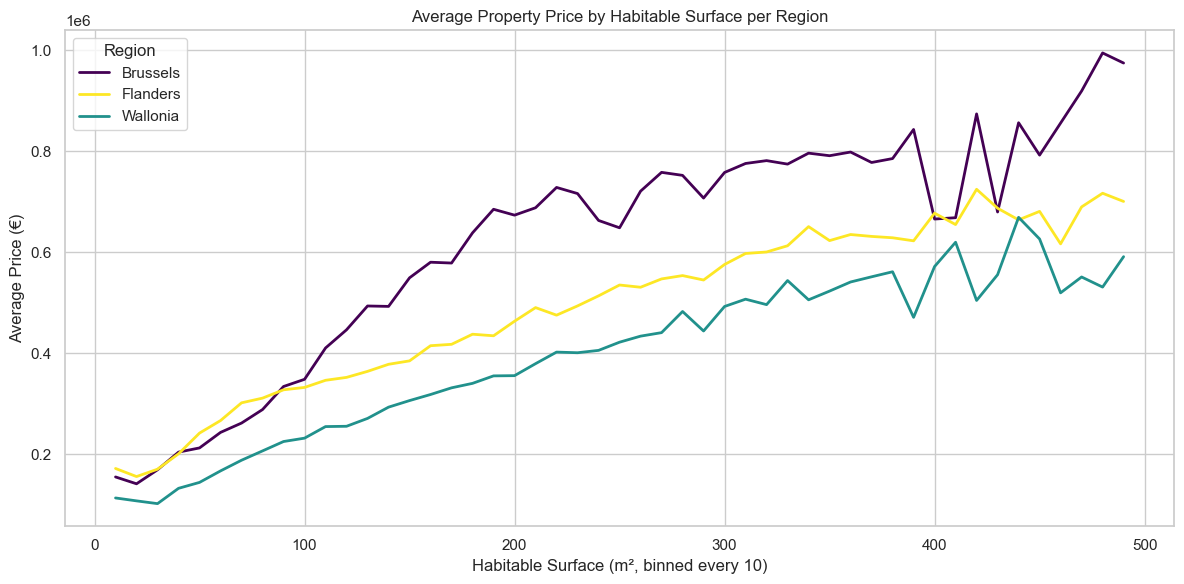

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load and clean data
df = pd.read_csv(input_file)
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df['habitableSurface'] = pd.to_numeric(df['habitableSurface'], errors='coerce')
df = df.dropna(subset=['price', 'habitableSurface', 'region'])

# Optional filtering to remove extreme outliers
df = df[(df['price'] < 1_000_000) & (df['habitableSurface'] < 500)]

# Group surface into bins (e.g. every 10 m²)
df['surface_bin'] = (df['habitableSurface'] // 10) * 10

# Group by region and surface_bin: average price
grouped = df.groupby(['region', 'surface_bin'])['price'].mean().reset_index()

# Seaborn style
sns.set_theme(style="whitegrid")

# Custom palette
region_palette = {
    'Brussels': '#440154',
    'Wallonia': '#21918c',
    'Flanders': '#fde725'
}

# Plot with seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=grouped,
    x='surface_bin',
    y='price',
    hue='region',
    palette=region_palette,
    linewidth=2
)

# Labels and style
plt.title("Average Property Price by Habitable Surface per Region")
plt.xlabel("Habitable Surface (m², binned every 10)")
plt.ylabel("Average Price (€)")
plt.legend(title="Region")
plt.tight_layout()
plt.show()


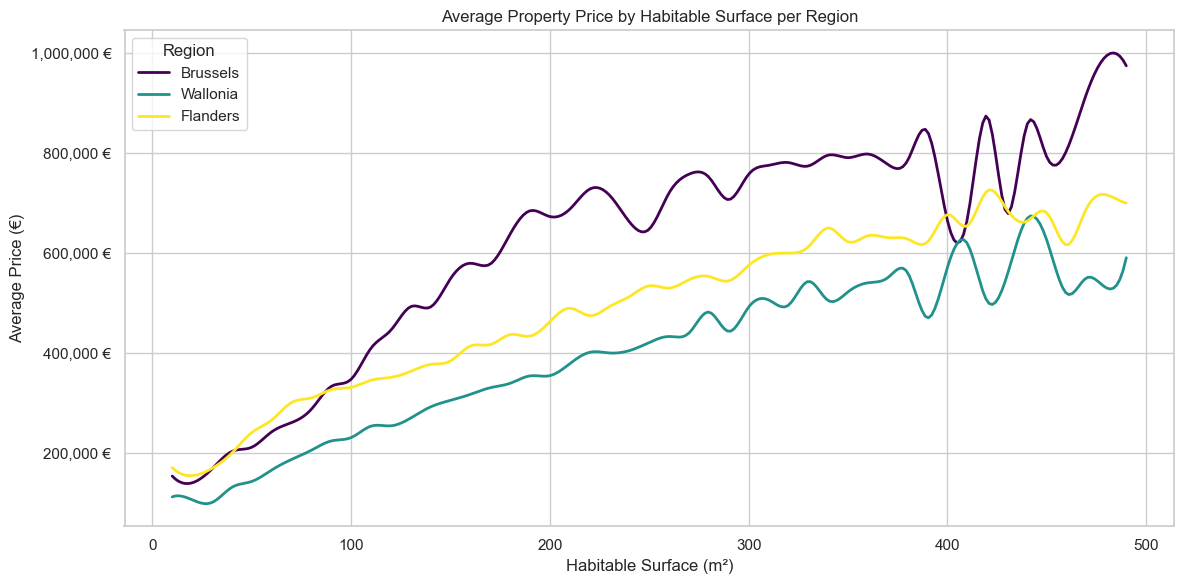

In [40]:
# same as before but with smoother lines

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from scipy.interpolate import make_interp_spline
import numpy as np

# Load and clean data
df = pd.read_csv(input_file)
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df['habitableSurface'] = pd.to_numeric(df['habitableSurface'], errors='coerce')
df = df.dropna(subset=['price', 'habitableSurface', 'region'])
df = df[(df['price'] < 1_000_000) & (df['habitableSurface'] < 500)]

# Bin surface
df['surface_bin'] = (df['habitableSurface'] // 10) * 10
grouped = df.groupby(['region', 'surface_bin'])['price'].mean().reset_index()

# Seaborn style
sns.set_theme(style="whitegrid")

# Colors
region_palette = {
    'Brussels': '#440154',
    'Wallonia': '#21918c',
    'Flanders': '#fde725'
}

# Plot setup
plt.figure(figsize=(12, 6))

# One smoothed line per region
for region, color in region_palette.items():
    region_data = grouped[grouped['region'] == region].sort_values(by='surface_bin')
    x = region_data['surface_bin']
    y = region_data['price']
    
    if len(x) >= 4:  # need at least 4 points for a good spline
        # Generate smooth x values
        x_smooth = np.linspace(x.min(), x.max(), 300)
        spline = make_interp_spline(x, y, k=3)  # cubic spline
        y_smooth = spline(x_smooth)
        plt.plot(x_smooth, y_smooth, label=region, color=color, linewidth=2)
    else:
        # fallback to original line if not enough points
        plt.plot(x, y, label=region, color=color, linewidth=2)

# Styling
plt.title("Average Property Price by Habitable Surface per Region")
plt.xlabel("Habitable Surface (m²)")
plt.ylabel("Average Price (€)")

# To format large numbers
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x):,} €'))

plt.legend(title="Region")
plt.tight_layout()
plt.show()


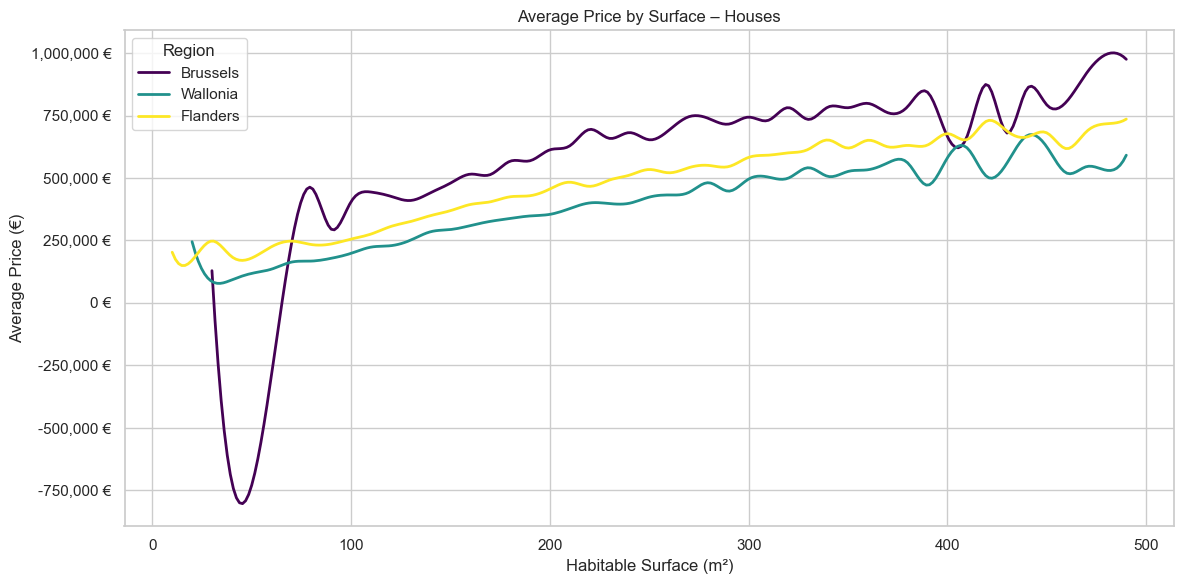

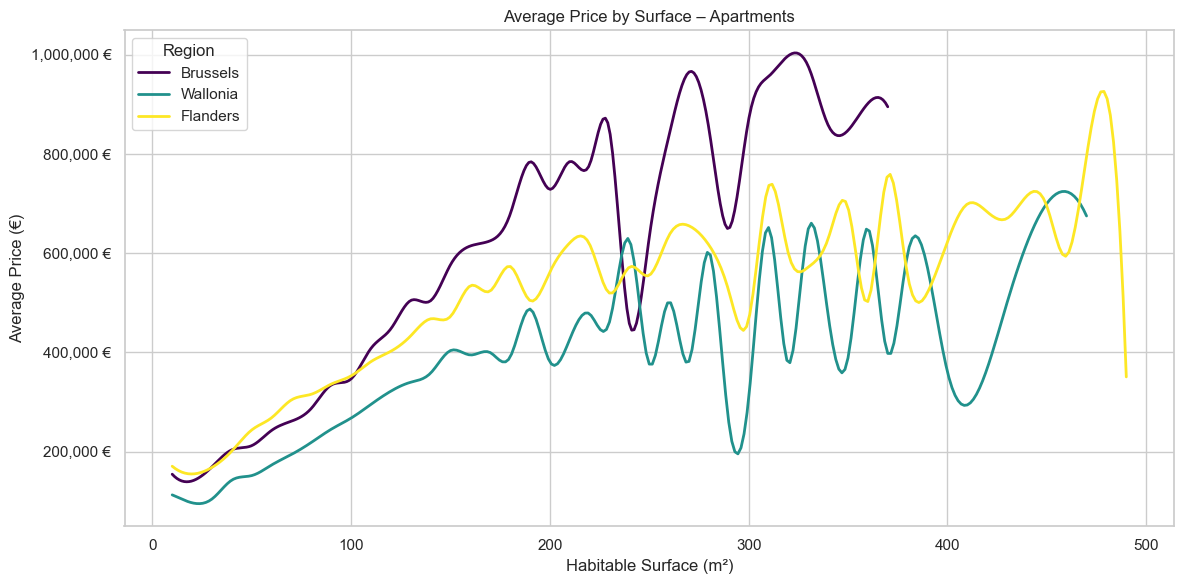

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.interpolate import make_interp_spline
import matplotlib.ticker as mtick

# Load and clean
df = pd.read_csv(input_file)
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df['habitableSurface'] = pd.to_numeric(df['habitableSurface'], errors='coerce')
df = df.dropna(subset=['price', 'habitableSurface', 'region', 'type'])
df = df[(df['price'] < 1_000_000) & (df['habitableSurface'] < 500)]

# Surface bins
df['surface_bin'] = (df['habitableSurface'] // 10) * 10

# Grouped averages
grouped = df.groupby(['type', 'region', 'surface_bin'])['price'].mean().reset_index()

# Colors per region
region_palette = {
    'Brussels': '#440154',
    'Wallonia': '#21918c',
    'Flanders': '#fde725'
}

# Seaborn style
sns.set_theme(style="whitegrid")

# Function to plot one chart per type
def plot_smoothed_lines(property_type):
    plt.figure(figsize=(12, 6))
    
    for region, color in region_palette.items():
        data = grouped[(grouped['type'] == property_type) & (grouped['region'] == region)]
        data = data.sort_values(by='surface_bin')

        x = data['surface_bin']
        y = data['price']

        if len(x) >= 4:
            x_smooth = np.linspace(x.min(), x.max(), 300)
            spline = make_interp_spline(x, y, k=3)
            y_smooth = spline(x_smooth)
            plt.plot(x_smooth, y_smooth, label=region, color=color, linewidth=2)
        else:
            plt.plot(x, y, label=region, color=color, linewidth=2)

    plt.title(f"Average Price by Surface – {property_type.title()}s")
    plt.xlabel("Habitable Surface (m²)")
    plt.ylabel("Average Price (€)")
    plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f"{int(x):,} €"))
    plt.legend(title="Region")
    plt.tight_layout()
    plt.show()

# 🔹 Plot for Houses
plot_smoothed_lines("HOUSE")

# 🔹 Plot for Apartments
plot_smoothed_lines("APARTMENT")


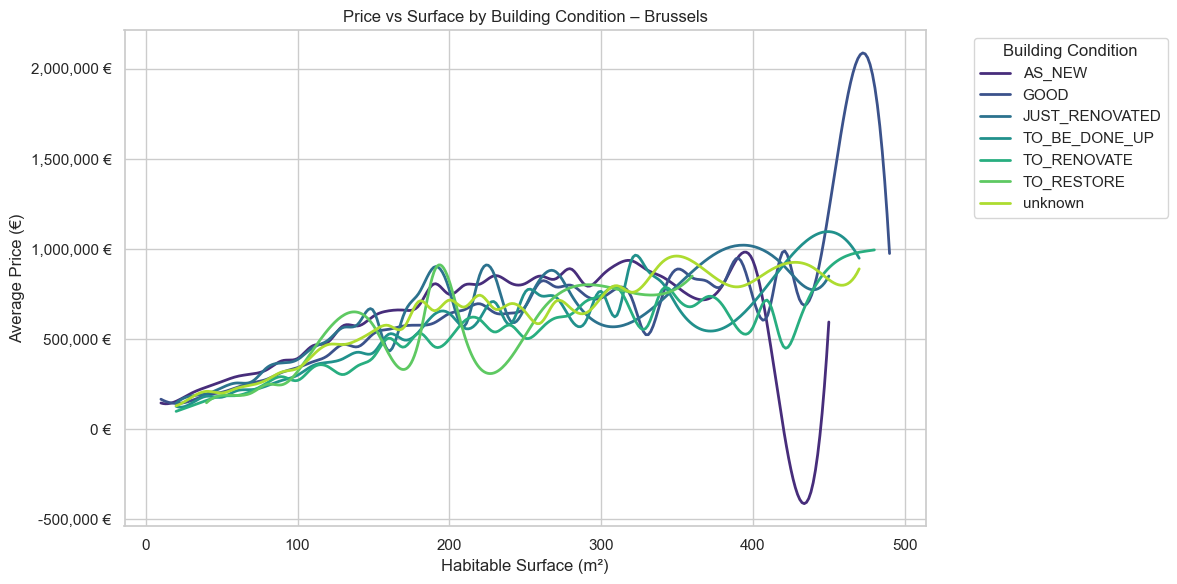

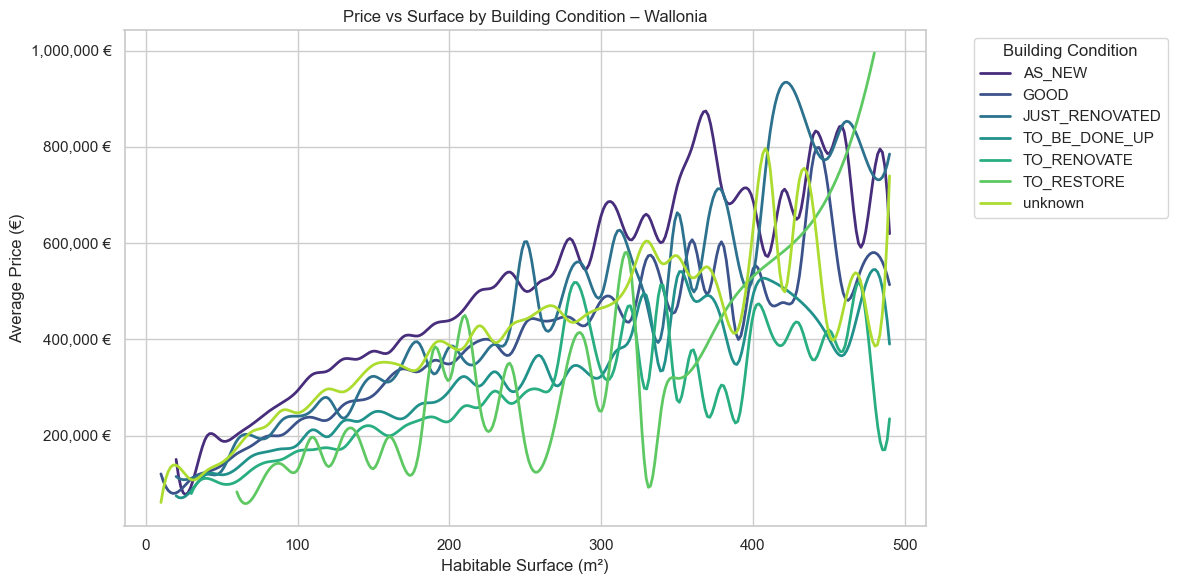

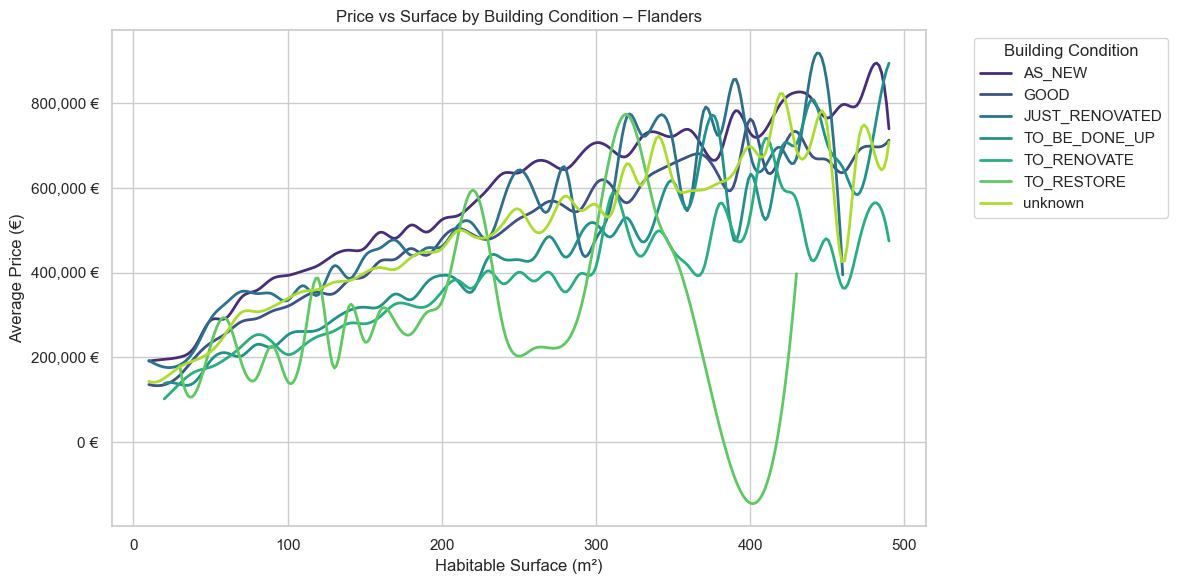

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.interpolate import make_interp_spline
import matplotlib.ticker as mtick

# Load and clean
df = pd.read_csv(input_file) 
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df['habitableSurface'] = pd.to_numeric(df['habitableSurface'], errors='coerce')
df = df.dropna(subset=['price', 'habitableSurface', 'region', 'buildingCondition'])
df = df[(df['price'] < 1_000_000) & (df['habitableSurface'] < 500)]

# Bin surfaces
df['surface_bin'] = (df['habitableSurface'] // 10) * 10

# Group by region, building condition, and surface
grouped = df.groupby(['region', 'buildingCondition', 'surface_bin'])['price'].mean().reset_index()

# Seaborn style
sns.set_theme(style="whitegrid")

# Define a color palette for buildingCondition (you can customize or auto-generate)
conditions = sorted(df['buildingCondition'].dropna().unique())
condition_palette = dict(zip(conditions, sns.color_palette("viridis", len(conditions))))

# Function to create a smoothed line chart for one region
def plot_building_condition_by_region(region):
    plt.figure(figsize=(12, 6))
    region_data = grouped[grouped['region'] == region]

    for condition in conditions:
        data = region_data[region_data['buildingCondition'] == condition].sort_values('surface_bin')
        x = data['surface_bin']
        y = data['price']

        if len(x) >= 4:
            x_smooth = np.linspace(x.min(), x.max(), 300)
            spline = make_interp_spline(x, y, k=3)
            y_smooth = spline(x_smooth)
            plt.plot(x_smooth, y_smooth, label=condition, color=condition_palette[condition], linewidth=2)
        elif len(x) > 1:
            plt.plot(x, y, label=condition, color=condition_palette[condition], linewidth=2)

    plt.title(f"Price vs Surface by Building Condition – {region}")
    plt.xlabel("Habitable Surface (m²)")
    plt.ylabel("Average Price (€)")
    plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f"{int(x):,} €"))
    plt.legend(title="Building Condition", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

# Generate 1 graph per region
for region in ['Brussels', 'Wallonia', 'Flanders']:
    plot_building_condition_by_region(region)
